#### Has network latency increased since ISP?

Ho - latency has remained the same 
Ha - latency  has increased or decreased

### Is the website redesign working functionally and all the navigation links work properly?

Ho - do all links work and correct infor?.
Ha - not all website links work and information is not correct.
true positive - all links work and website shows the correct informtion.
false positive - the link is broken but the information is right.
click a link and it works but shows wrong information.
true negative - click a link and it works but shows wrong information.
false negative - links are broken and information is wrong. 

### Effectiveness of an Ad
Ho- sales did not increase or decrease revenue
Ha - sales increased or decreased over time. 

In [27]:
from pydataset import data

1.  ttest - two observed means that depend on the population of students. 

2.  ttest - two observed means that depend on adults who drink milk and who dont drink milk. 

3. ttest - two observed means that depend on gas prices in New Mexico and Texas.

4. ANOVA - measure the distance between all three observed means. 

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env

%config InlineBackend.figure_format='retina'

mpg = data('mpg')

In [305]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [306]:
mpg.count()

manufacturer    234
model           234
displ           234
year            234
cyl             234
trans           234
drv             234
cty             234
hwy             234
fl              234
class           234
dtype: int64

### Is there a difference in fuel efficiency between cars from 2008 vs 1999

In [307]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [308]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [309]:
mpg['average_mileage'] = (mpg.hwy+mpg.cty)/2 

### Independent t-test (a.k.a Two Sample t-test)

Goal: Find a difference in fuel efficiency between cars from 2008 vs 1999

H0 Group A - is no difference 
Ha Group B - increase or decrease in vehicles

Verify assumptions:

- Check that we have 30 observations: yes, 234

- Independence



<AxesSubplot:>

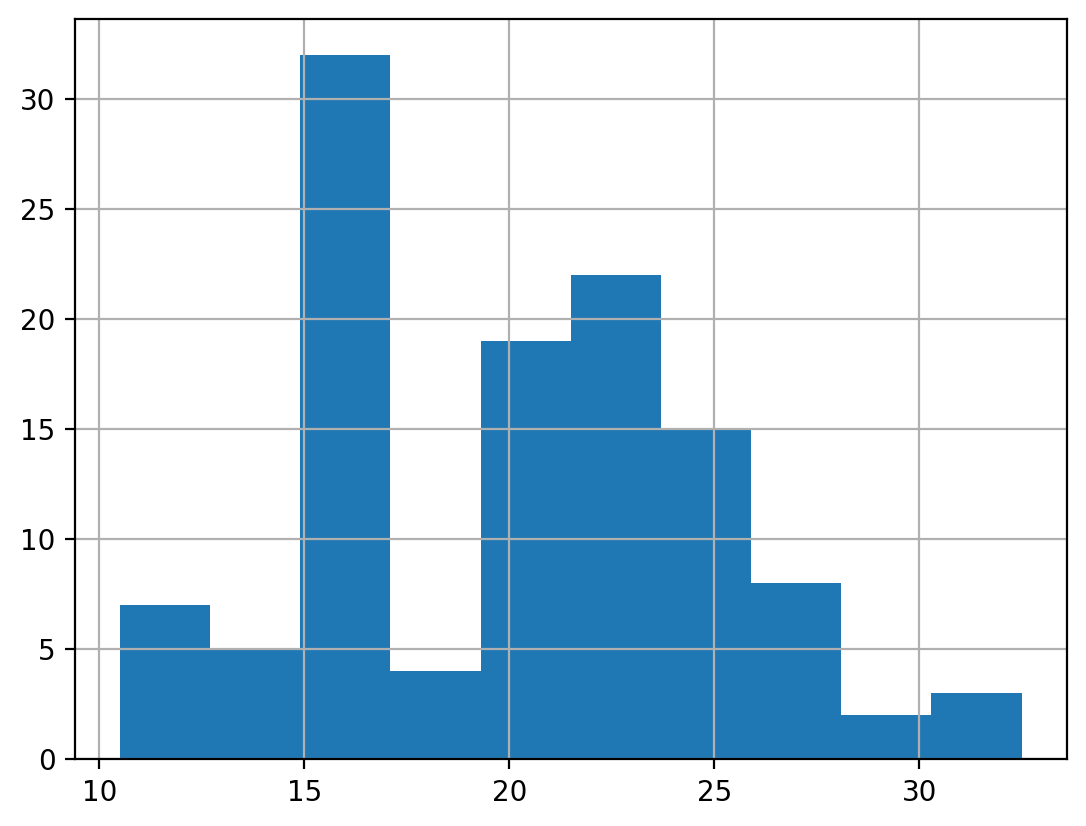

In [310]:
year_08 = mpg[mpg.year == 2008].average_mileage # year 2008 with average mileage returned
year_08.hist()

<AxesSubplot:>

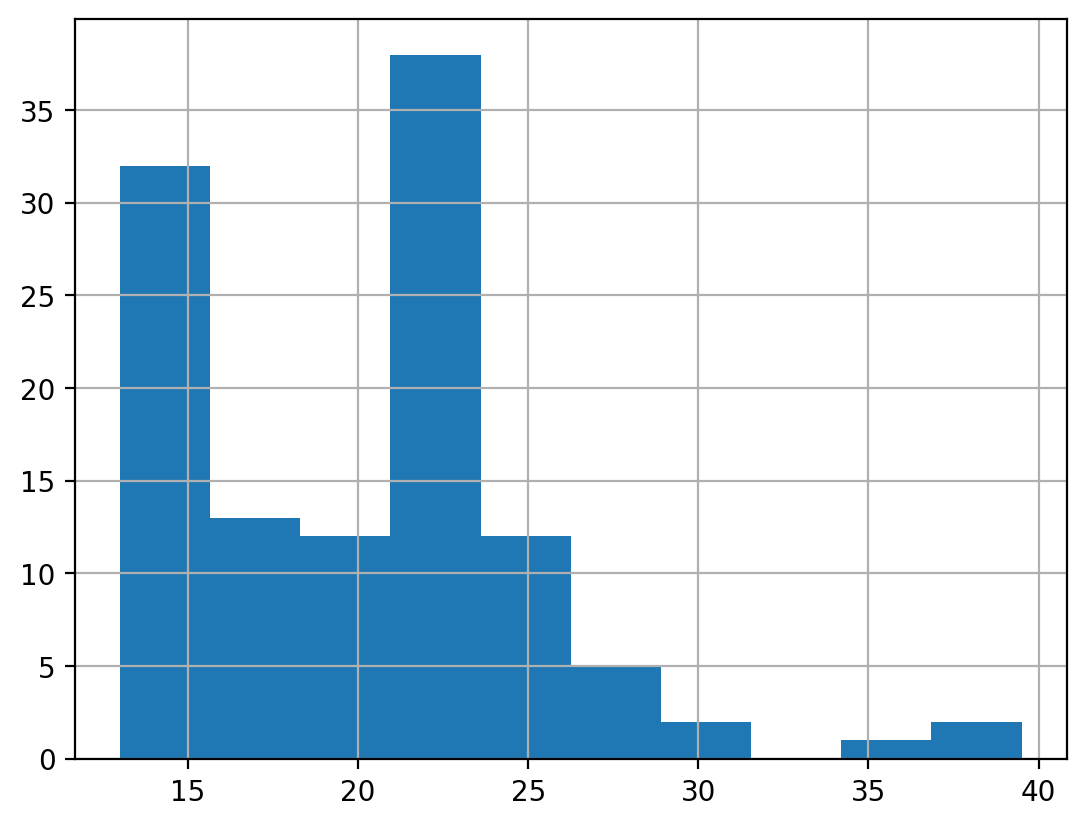

In [311]:
year_99 = mpg[mpg.year == 1999].average_mileage # year 1999 with average mileage returned
year_99.hist()

In [312]:
α = 0.05 # Significance level

In [313]:
t, p = stats.ttest_ind(year_08, year_99, equal_var=False)

In [314]:
p < α


False

In [315]:
# It t-statistic < 0
print("Is t < 0?", t < 0)

# Is p/2 < alpha
print("Is p/2 < alpha?", p/ 2 < α)

Is t < 0? True
Is p/2 < alpha? False


In [316]:
if p < α:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")


We fail to reject $H_{0}$


Takeaway:  We failed to reject the null hypothesis, there is no difference in fuel efficiency between cars made in 1999 and 2008. 

### Are compact cars more fuel-efficient than the average car?

In [317]:
### Independent t-test (a.k.a Two Sample t-test)

Goal: Find a difference in fuel efficiency between cars compact cars and average cars?

H0 Group A - is no difference 
Ha Group B - increase or decrease in vehicles

Verify assumptions:

- Check that we have 30 observations: yes, 234

- Independence

variance


SyntaxError: invalid syntax (1175093283.py, line 5)

In [318]:
compact_mileage = mpg[mpg["class"] == "compact"].average_mileage.mean()

In [319]:
not_compact_mileage = mpg.average_mileage.mean()

In [320]:
compact_mileage.hist()

AttributeError: 'float' object has no attribute 'hist'

In [321]:
not_compact_mileage.hist()

AttributeError: 'float' object has no attribute 'hist'

In [322]:
t, p = stats.ttest_1samp(compact_mileage, not_compact_mileage)

t, p

/var/folders/51/1y9bskdx161fnwxyf68jcl540000gn/T/ipykernel_33644/2246291425.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = stats.ttest_1samp(compact_mileage, not_compact_mileage)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


(nan, nan)

In [323]:
α = .05

if t > 0 and p/2 <= α:
    print('Reject null')
else: 
    print('Fail to reject null')

Fail to reject null


### Do manual cars get better gas mileage than automatic cars?

In [324]:
Goal: Find a difference in fuel efficiency between manual cars and automatic cars?

H0 Group A - is no difference 
Ha Group B - increase or decrease in vehicles

Verify assumptions:

- Check that we have 30 observations: yes, 234

- Independence

variance


SyntaxError: invalid syntax (58292799.py, line 3)

In [325]:
mpg['is_automatic']=mpg.trans.str.contains('auto')==True

In [326]:
mpg['is_automatic'] = mpg['is_automatic'].replace({True: 'Automatic', False: 'Manual'})

In [327]:
auto_mileage= mpg[mpg['is_automatic'] == 'Automatic'].average_mileage

In [328]:
manual_mileage = mpg[mpg['is_automatic'] == 'Manual'].average_mileage

<AxesSubplot:>

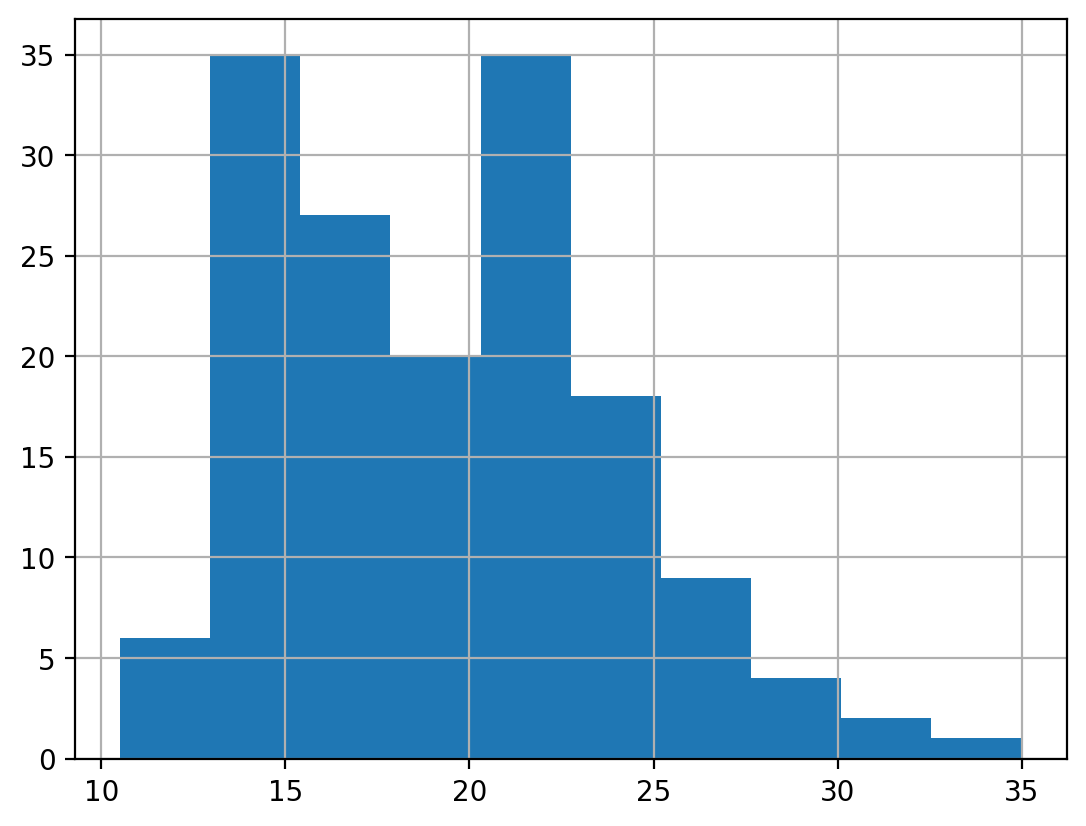

In [329]:
auto_mileage.hist()

<AxesSubplot:>

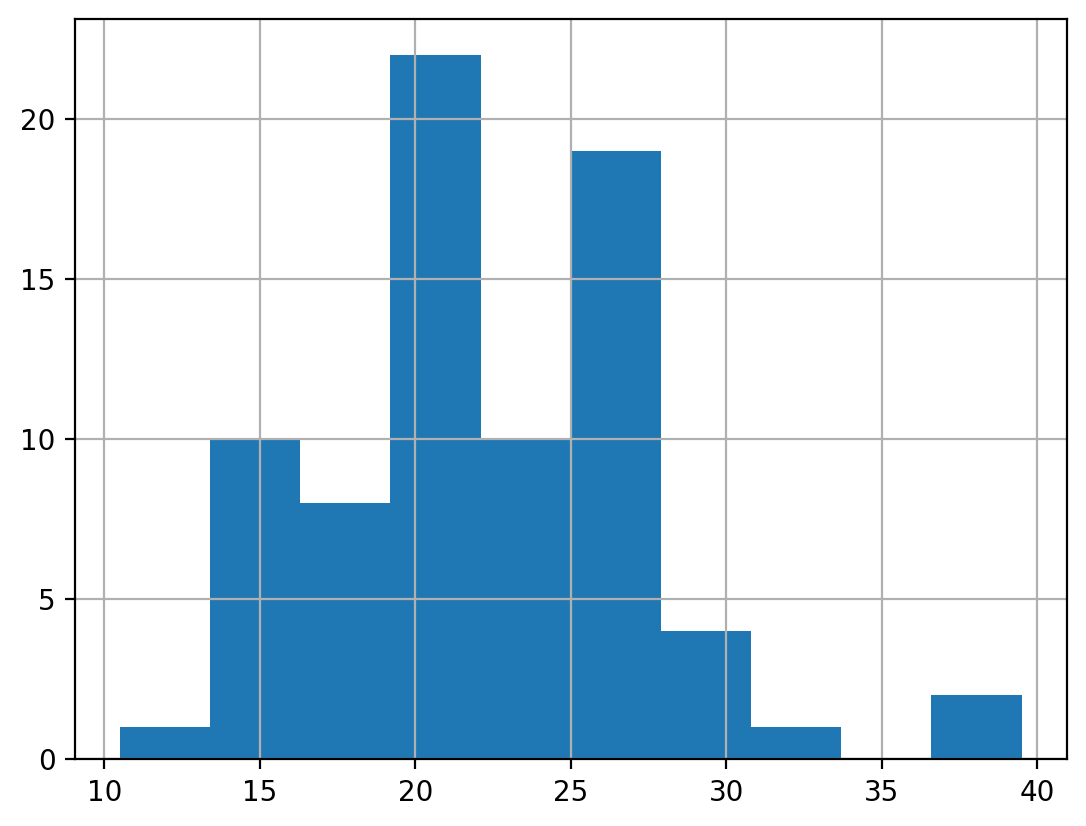

In [330]:
manual_mileage.hist()

In [331]:
t, p = stats.ttest_ind(auto_mileage, manual_mileage, equal_var=False)

In [332]:
# It t-statistic < 0
print("Is t < 0?", t < 0)

# Is p/2 < alpha
print("Is p/2 < alpha?", p/ 2 < α)

Is t < 0? True
Is p/2 < alpha? True


In [333]:
if p < α:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


In [334]:
from scipy import stats
from pydataset import data

In [335]:
office_one = stats.norm(90, 15)

In [336]:
office_two = stats.norm(100, 20)

In [337]:
office_one

In [338]:
office_one.rvs(40)

array([ 93.42894174,  98.32786441,  85.04987532,  78.42944362,
        84.06312258, 105.02556367,  87.28306892,  95.67582768,
        94.01753636,  84.93330138,  89.25285944, 109.07194077,
        81.40463592,  89.32672816, 110.49690007, 106.57444945,
        92.18598238, 101.61438924,  84.15257317, 102.56718289,
        70.8765624 ,  96.31047282,  97.5868455 ,  74.04525205,
       111.25937875,  73.25527809,  80.79076295,  76.13266873,
        66.2536158 ,  81.69324753, 100.02968753,  63.72698714,
       110.76433321,  92.38856257,  62.20939816, 112.16494035,
        99.20937291,  94.11086138, 101.97609452, 118.44953138])

In [339]:
dist_one = office_one.rvs(40)
dist_two = office_two.rvs(50)

In [340]:
dist_one.var(), dist_two.var() #checking variances in both samples to find the difference

(177.1919913123142, 378.9040409549873)

In [341]:
stats.levene(dist_one, dist_two) #pvalue

LeveneResult(statistic=7.016722001713533, pvalue=0.009571192748180572)

In [342]:
t, p = stats.ttest_ind(dist_one, dist_two, equal_var=False) # order of left to right, comparing the difference from 0 to 1, could result in negative value.
t, p

(-2.7523713934323366, 0.0072135170514351565)

In [343]:
t, p = stats.ttest_ind(dist_two, dist_one, equal_var=False)

t, p

(2.7523713934323366, 0.0072135170514351565)

In [344]:
Null: There is no difference between the two distributions
Alternative: There is a significant difference between the two distributions

SyntaxError: invalid syntax (4056462719.py, line 1)

In [345]:
α = 0.05

In [346]:
if p <= α:
    print('reject null')
else:
    print('Fail to reject null')

reject null


Takeaway: we rejected the null hypothesis, there is a significant difference between the two offices.

## III. Correlation
### Answer with the type of stats test you would use (assume normal distribution):

### Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?

Pearson 

- Do guys and gals quit their jobs at the same rate?

Independent T-Test

- Does the length of time of the lecture correlate with a students grade?
spearmean r

## 1. Use the telco_churn data.

In [347]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
customer_df = pd.read_sql('select * FROM customers', url)


In [348]:
customer_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


- Does tenure correlate with monthly charges?

In [349]:
customer_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [350]:
#customer_df.loc[customer_df['churn']== 'Yes'].total_charges.astype('float').mean() # previous entry for churn calculation

charges_df = customer_df[['monthly_charges', 'tenure']] #showing the monthly customers and tenure columns
charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

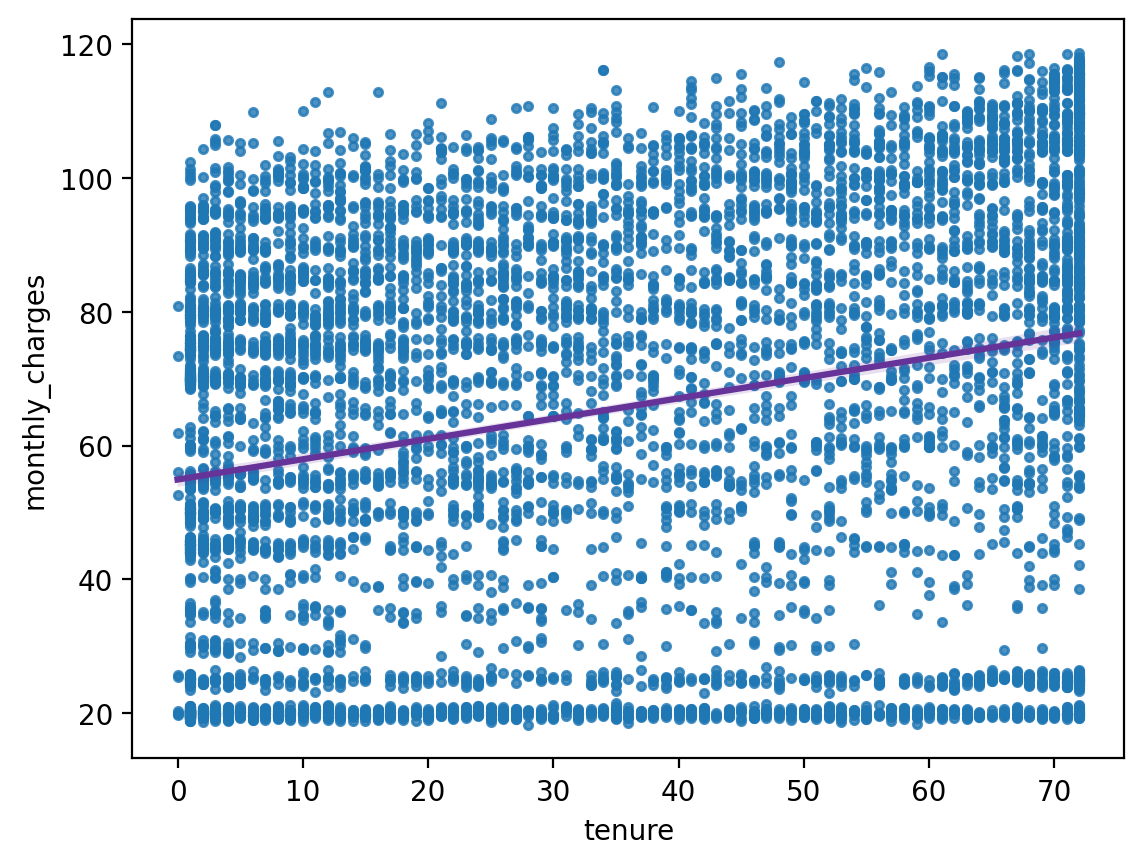

In [351]:
sns.regplot(x='tenure', y='monthly_charges',  # plotting data that shows the correlation of the monthly charges and tenure for each customer
            data=charges_df, marker='.', 
            line_kws={'color': 'rebeccapurple'})

In [352]:
α = 0.05 # setting the alpha = .05

In [353]:
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges) # no order necessary 
## Showing the correlation strength of the best fit line correlation and p-value
r, p

(0.27641678933130215, 1.0271266876409408e-123)

In [354]:
# defining a function that prints our findings and calls the variable to print whether to reject the H_0 or fail to reject(H_a)
def findings(α, p):
    if p < α:
        print( f'reject the null hypothesis.there is a linear correalation better monthly charges and tenure (p-value: {p})')
    else:
        print(f'we fail to reject the null hypothesis that there is a linear correalation between monthly charges and tenure (p-value: {p})')

findings(α, p)      

reject the null hypothesis.there is a linear correalation better monthly charges and tenure (p-value: 1.0271266876409408e-123)


**Takeaways**

There is a correlation between monthly charges and tenure. 
With an r of .28, we can say that there is a correlation with an increase/decrease in monthly payments and tenure

### Does Tenure correlate with total charges?

- H_0: There is no linear correlation between tenure and total charges.
- H_a: There is a linear correlation between tenure and total charges.

In [355]:
#Setting the alpha
α = 0.05 

# Selecting the data
total_charges_tenure_df = customer_df[['tenure', 'total_charges']]
total_charges_tenure_df

,tenure,total_charges
0,9,593.3
1,9,542.4
2,4,280.85
3,13,1237.85
4,3,267.4
...,...,...
7038,13,742.9
7039,22,1873.7
7040,2,92.75
7041,67,4627.65


## Chi Square Exercises

### Answer with the type of stats test you would use (assume normal distribution):
- Do students get better test grades if they have a rubber duck on their desk?
    -t-test 1 tail

- Does smoking affect when or not someone has lung cancer?
    - Chi Square testing

- Is gender independent of a person’s blood type?
    -Yes, Chi square testing

- A farming company wants to know if a new fertilizer has improved crop yield or not
    - t-test 2 tail

- Does the length of time of the lecture correlate with a students grade?
    - pearsonr

- Do people with dogs live in apartments more than people with cats?
- chi testing

**Whether using a macbook and being a codeup student are independent of each other.**

-*The data shows that there is a relationship between codeup students and macbooks vs not being a codeup student and macbooks.*

## III. MPG dataset

### Is there a correlation between transmission of cars and manufacturers?

$H_0$: There is not a significant relationship between the mpg transmission and manufacturer.

$H_a$: There is a significant correlation between mpg transmission and manufacturer. 

In [356]:
mpg = data('mpg')

In [357]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [358]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [359]:
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [360]:
observed = pd.crosstab(mpg.drv, mpg.manufacturer)
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
drv,,,,,,,,,,,,,,,
4,11,4,26,13,0,0,8,4,0,4,4,0,14,15,0
f,7,5,11,0,9,14,0,0,0,0,9,5,0,19,27
r,0,10,0,12,0,0,0,0,3,0,0,0,0,0,0


In [362]:
α = 0.05 # Setting the alpha

In [363]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

### Review Findings

In [367]:
# observed array
print(observed.values)

[[11  4 26 13  0  0  8  4  0  4  4  0 14 15  0]
 [ 7  5 11  0  9 14  0  0  0  0  9  5  0 19 27]
 [ 0 10  0 12  0  0  0  0  3  0  0  0  0  0  0]]


In [370]:
# Expected array
print(expected.astype(int))

[[ 7  8 16 11  3  6  3  1  1  1  5  2  6 14 11]
 [ 8  8 16 11  4  6  3  1  1  1  5  2  6 15 12]
 [ 1  2  3  2  0  1  0  0  0  0  1  0  1  3  2]]


In [371]:
# chi2 value. 
print(f'chi^2 = {chi2:.4f}') 

chi^2 = 232.0345


In [376]:
# p-value.
print(f'p= {p}')

p= 5.128094076734575e-34


In [374]:
print('Is p-value < alpha?', p < α)


Is p-value < alpha? True


In [379]:
expected
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
drv,,,,,,,,,,,,,,,
4,11,4,26,13,0,0,8,4,0,4,4,0,14,15,0
f,7,5,11,0,9,14,0,0,0,0,9,5,0,19,27
r,0,10,0,12,0,0,0,0,3,0,0,0,0,0,0


In [382]:
print("Expected DataFrame")
print(pd.DataFrame(expected.astype('int'), index=observed.index, columns=observed.columns))

Expected DataFrame
manufacturer  audi  chevrolet  dodge  ford  honda  hyundai  jeep  land rover  \
drv                                                                            
4                7          8     16    11      3        6     3           1   
f                8          8     16    11      4        6     3           1   
r                1          2      3     2      0        1     0           0   

manufacturer  lincoln  mercury  nissan  pontiac  subaru  toyota  volkswagen  
drv                                                                          
4                   1        1       5        2       6      14          11  
f                   1        1       5        2       6      15          12  
r                   0        0       1        0       1       3           2  


In [383]:
print("\n")
print("Observed DataFrame")
print(observed)



Observed DataFrame
manufacturer  audi  chevrolet  dodge  ford  honda  hyundai  jeep  land rover  \
drv                                                                            
4               11          4     26    13      0        0     8           4   
f                7          5     11     0      9       14     0           0   
r                0         10      0    12      0        0     0           0   

manufacturer  lincoln  mercury  nissan  pontiac  subaru  toyota  volkswagen  
drv                                                                          
4                   0        4       4        0      14      15           0  
f                   0        0       9        5       0      19          27  
r                   3        0       0        0       0       0           0  


**Takeaways**

We can see by comparing the contingency tables that the observed values are not very close to the expected values. We can confirm that, with the data available, there does not appear to be a significant relationship between transmission drive and manufacturer. 

### IV. Employees Dataset 

### Is there a correlation between transmission of cars and manufacturers?

$H_0$: There is not a significant relationship between the gender and departments: sales and customer service.

In [389]:
import pandas as pd
import env

def get_db_url(username, password, host, db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

url = get_db_url(env.username, env.password, env.host, db='employees') # Loading dataset 

In [424]:
query = '''
SELECT *
FROM employees AS a
JOIN dept_emp AS b
ON a.emp_no = b.emp_no
JOIN departments AS c
ON b.dept_no = c.dept_no
WHERE to_date > CURDATE()
AND dept_name IN ('Customer Service', 'Sales')
ORDER BY dept_name ASC
'''
employees_df = pd.read_sql(query, url)

In [425]:
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,dept_no,dept_name
0,10038,1960-07-20,Huan,Lortz,M,1989-09-20,10038,d009,1989-09-20,9999-01-01,d009,Customer Service
1,10049,1961-04-24,Basil,Tramer,F,1992-05-04,10049,d009,1992-05-04,9999-01-01,d009,Customer Service
2,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,10060,d009,1992-11-11,9999-01-01,d009,Customer Service
3,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,10088,d009,1992-03-21,9999-01-01,d009,Customer Service
4,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,10112,d009,1998-05-01,9999-01-01,d009,Customer Service


In [426]:
employees_df.columns

Index(['emp_no', 'birth_date', 'first_name', 'last_name', 'gender',
       'hire_date', 'emp_no', 'dept_no', 'from_date', 'to_date', 'dept_no',
       'dept_name'],
      dtype='object')

In [428]:
employees_df.drop(['emp_no', 'hire_date', 'birth_date', 'dept_no','from_date', 'to_date', 'first_name', 'last_name'], axis=1) # Data cleaning process

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
55265,F,Sales
55266,M,Sales
55267,M,Sales
55268,F,Sales


In [429]:
α = 0.05 # Setting the alpha

In [430]:
observed = pd.crosstab(employees_df.gender, employees_df.dept_name)

In [431]:
observed # observed DataFrame

dept_name,Customer Service,Sales
gender,,
F,7007,14999
M,10562,22702


In [437]:
chi2, p, degf, expected = stats.chi2_contingency(observed) # Chi square testing

### Review Findings

In [438]:
# Expected array
print(expected.astype(int))

[[ 6995 15010]
 [10573 22690]]


In [439]:
# chi2 value. 
print(f'chi^2 = {chi2:.4f}') 

chi^2 = 0.0446


In [440]:
# p-value.
print(f'p= {p}')

p= 0.8326526135574065


In [441]:
print('Is p-value < alpha?', p < α)

Is p-value < alpha? False


In [445]:
expected

array([[ 6995.17666003, 15010.82333997],
       [10573.82333997, 22690.17666003]])

In [444]:
observed

dept_name,Customer Service,Sales
gender,,
F,7007,14999
M,10562,22702


In [446]:
print("Expected DataFrame")
print(pd.DataFrame(expected.astype('int'), index=observed.index, columns=observed.columns))

Expected DataFrame
dept_name  Customer Service  Sales
gender                            
F                      6995  15010
M                     10573  22690


In [447]:
print("\n")
print("Observed DataFrame")
print(observed)



Observed DataFrame
dept_name  Customer Service  Sales
gender                            
F                      7007  14999
M                     10562  22702


**Takeaways**

We can see by comparing the contingency tables that the observed values are very close to the expected values. We can confirm that, with the data available, there does appear to be a significant relationship between gender and department: sales and customer service. 